## BOOMBIKES SHARING CASE STUDY-USING MULTIPLE LINEAR REGRESSION MODEL

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with
a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy 
restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine 
situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs 
once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. 
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

1.Which variables are significant in predicting the demand for shared bikes.
2.How well those variables describe the bike demands

The note book consists of following :
    1.Reading and understanding the Data.
    2.Data preparation.
    3.Training the model.
    4.Building the model.
    5.Residual analysis.
    6.prediction and evaluation on Test data.
    

# STEP 1 :Reading and understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv("day.csv")

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data cleaning

In [6]:
#checking if there are any null values in the dataset
df.isnull().sum()
#hence there are no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Drop columns which are not useful for analysis
1.instant - it shows the record value we already have index value when we print so we can drop it
2.dteday - as we already have the year month and week in data represted in binary so we can drop it
3.in the data dictionary they mentioned that cnt values is the sum of casual and registered values so we can drop it

In [7]:
#axis=1 means we are dropping column if axis=0 dropping the row
df.drop(['instant'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

In [8]:
#let us rename the columns so that it gives better understanding to the person reading the code
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


In [9]:
# in the data the columns season,year,month,holiday,weekday,workingday,weathersit are categorical variables
#now we have to change the values for season,weekday and weathersit 

In [10]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df['weathersit'].replace({1:"partly_cloudy",2:"broken_clouds",3:"light_rain",4:"heavy_rain"},inplace=True)
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,6,0,broken_clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,broken_clouds,14.902598,17.68695,69.6087,16.652113,801


In [12]:
df["weekday"].replace({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"sunday"},inplace=True)
df.head(7)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,sunday,0,broken_clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sunday,0,broken_clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,monday,1,partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tuesday,1,partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wednesday,1,partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,thursday,1,partly_cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,friday,1,broken_clouds,8.057402,10.44195,49.8696,11.304642,1510


In [13]:
df["month"].replace({1:"jan",2:"feb",3:"march",4:"april",5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},inplace=True)
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sunday,0,broken_clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,broken_clouds,14.902598,17.68695,69.6087,16.652113,801


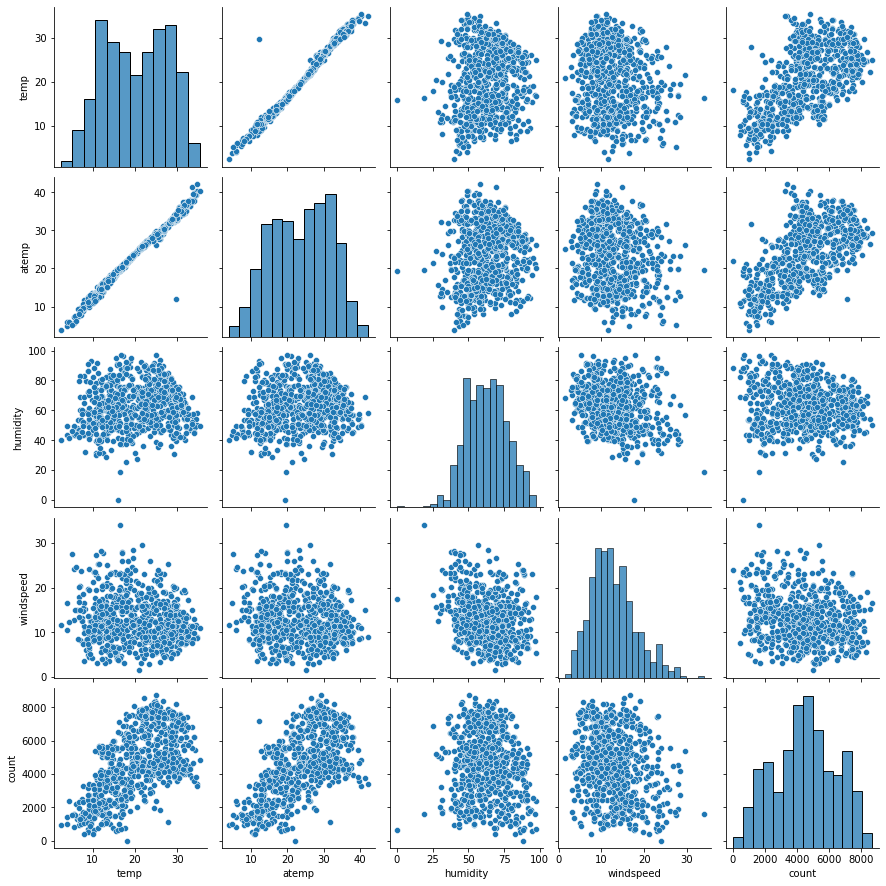

In [14]:
#visualising the numerical variables in the dataset
sns.pairplot(df,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()
#we can see a linear relationship between temp and a temp 

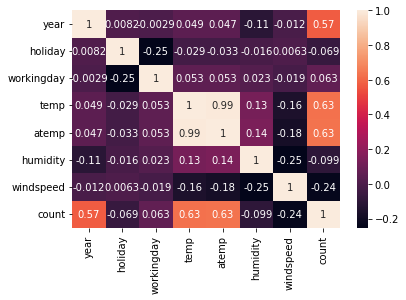

In [15]:
#let us check the correlation between for the data
sns.heatmap(df.corr(),annot=True)
plt.show()
#atemp and temp are highly correlated almost equal to 1-so i think we can drop either of the column and consider any one

In [16]:
#let us drop temp
df.drop(["temp"],axis=1,inplace=True)
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,0,jan,0,sunday,0,broken_clouds,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,broken_clouds,17.68695,69.6087,16.652113,801


<AxesSubplot:xlabel='season', ylabel='count'>

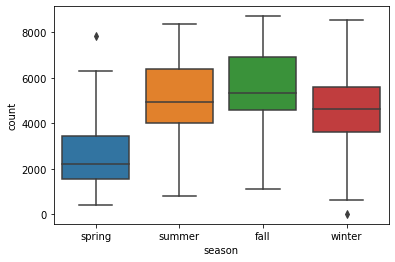

In [17]:
#visualizing the categorical variables in the dataset
sns.boxplot(x="season",y="count",data=df)


<AxesSubplot:xlabel='year', ylabel='count'>

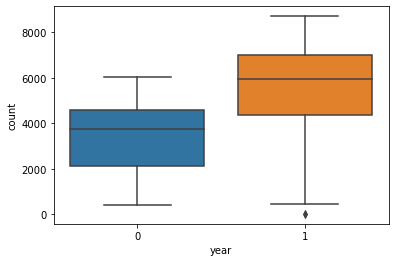

In [18]:
sns.boxplot(x="year",y="count",data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

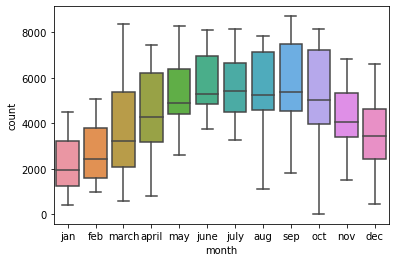

In [19]:
sns.boxplot(x="month",y="count",data=df)

<AxesSubplot:xlabel='holiday', ylabel='count'>

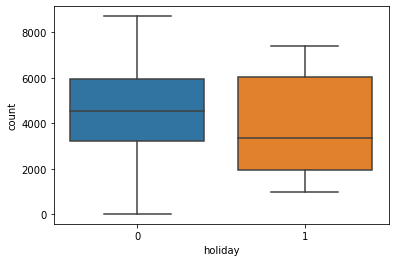

In [20]:
sns.boxplot(x="holiday",y="count",data=df)

<AxesSubplot:xlabel='weekday', ylabel='count'>

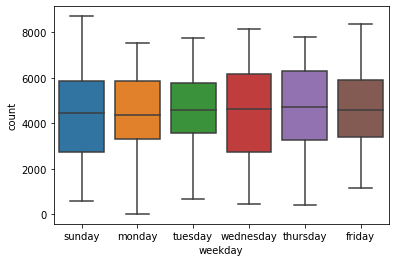

In [21]:
sns.boxplot(x="weekday",y="count",data=df)

<AxesSubplot:xlabel='workingday', ylabel='count'>

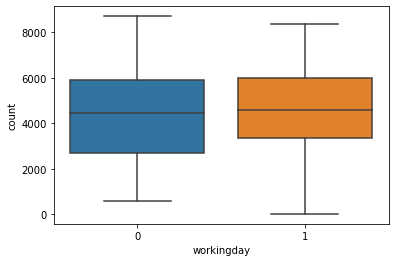

In [22]:
sns.boxplot(x="workingday",y="count",data=df)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

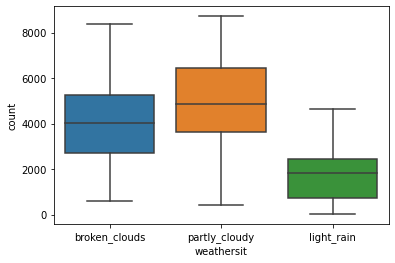

In [23]:
sns.boxplot(x="weathersit",y="count",data=df)

the relationship between categorical and target variables
bike rents are more during
1.during fall season and in summer
in 2019 year when compared to 2018
in partly cloudy
on sat,wed,thu

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [25]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [26]:
df.shape

(730, 11)

# Univariate Analysis

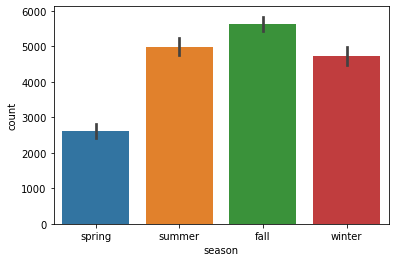

In [27]:
# barplot between season and target var=count

sns.barplot("season","count",data=df)
plt.show()

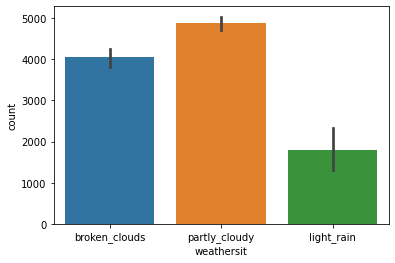

In [28]:
#graph between weathersit and count
sns.barplot("weathersit","count",data=df)
plt.show()

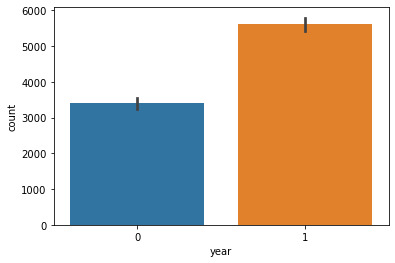

In [29]:
#graph between year and count
sns.barplot("year","count",data=df)
plt.show()

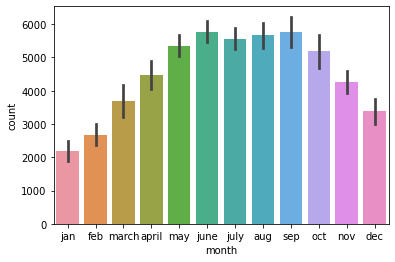

In [30]:
#graph between month and count
sns.barplot("month","count",data=df)
plt.show()


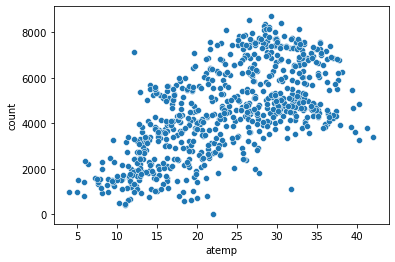

In [31]:
#graph between atemp and count
sns.scatterplot(x="atemp",y="count",data=df)
plt.show()


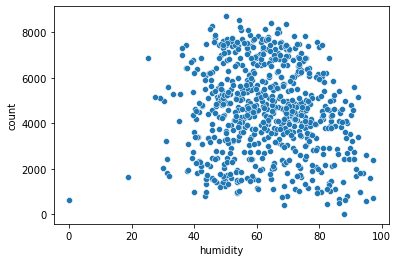

In [32]:
#graph between humidity and count 
sns.scatterplot(x="humidity",y="count",data=df)
plt.show()


### BIKE RENTALS MORE DURING:

#####  1.during the fall season and summer

##### 2.during partly_cloudy

##### 3.during year 2018

##### 4.during the month of sep

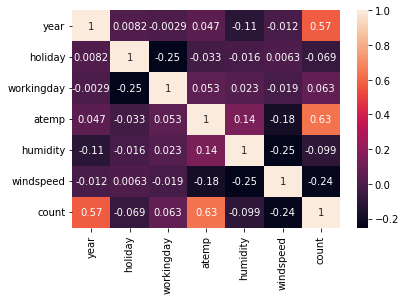

In [33]:
#using heatmap to check correlation between the variables
sns.heatmap(df.corr(),annot=True)
plt.show()

# STEP 2 : Data Preparation




#### 1.creating dummy variables


#### 2.Splliting into train and test


#### 3.Rescaling of variables

In [34]:
df['month']=df['month'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [36]:
Period=pd.get_dummies(df['season'],drop_first=True)
Climate=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['month'],drop_first=True)



In [37]:
df=pd.concat([df,Period],axis=1)
df=pd.concat([df,Climate],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   year           730 non-null    int64  
 2   month          730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   atemp          730 non-null    float64
 8   humidity       730 non-null    float64
 9   windspeed      730 non-null    float64
 10  count          730 non-null    int64  
 11  spring         730 non-null    uint8  
 12  summer         730 non-null    uint8  
 13  winter         730 non-null    uint8  
 14  light_rain     730 non-null    uint8  
 15  partly_cloudy  730 non-null    uint8  
 16  monday         730 non-null    uint8  
 17  sunday         730 non-null    uint8  
 18  thursday  

In [38]:
# dropping the original columns
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['month'],axis=1,inplace=True)

In [39]:
df.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,dec,feb,jan,july,june,march,may,nov,oct,sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
df.columns

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'count', 'spring', 'summer', 'winter', 'light_rain', 'partly_cloudy',
       'monday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'aug', 'dec',
       'feb', 'jan', 'july', 'june', 'march', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

# Splitting data into Train and Test

In [41]:
#now we have to split the data into train test split
#we have imported the neccesary library in the starting itself

df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)


(510, 28)
(219, 28)


# Rescaling the features

In [42]:
#for the model to be easily understandable we need to scale the values
#there are basically of two types min-max scaling and standardization.

In [43]:
#1.Instantiating an object
scaler=MinMaxScaler()

#2.creating a list of numerical variables
num_vars=["atemp","humidity","windspeed","count"]

#3.fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,dec,feb,jan,july,june,march,may,nov,oct,sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,dec,feb,jan,july,june,march,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### all the numbers are mapped between 0 and 1

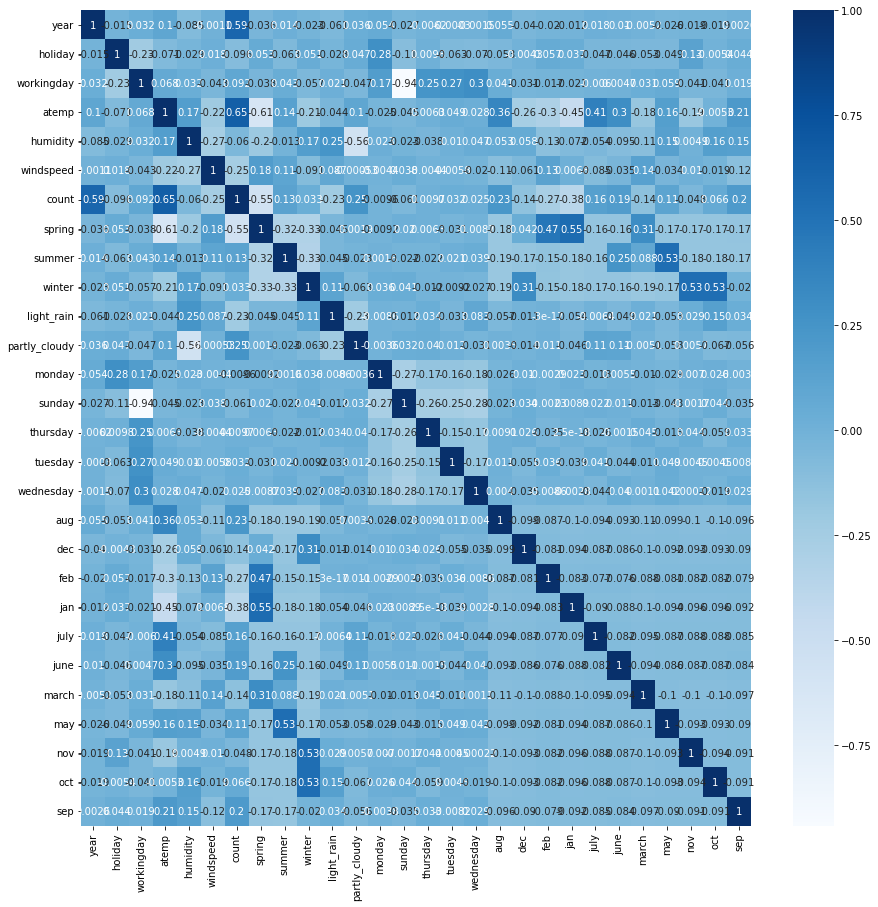

In [45]:
#checking the correlation between variables
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(),annot=True,cmap="Blues")
plt.show()

# STEP 3 :Training a model

In [46]:
#dividing the training set into X and y for building the model

y_train=df_train.pop("count")
X_train=df_train

# Recursive Feature Elimination

In [47]:
#we choose 15 variables and use a mixed approch to build the model

estimator= LinearRegression()
estimator.fit(X_train,y_train)

selector=RFE(estimator,n_features_to_select=15)
selector.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('partly_cloudy', True, 1),
 ('monday', False, 8),
 ('sunday', True, 1),
 ('thursday', False, 10),
 ('tuesday', False, 9),
 ('wednesday', False, 11),
 ('aug', False, 6),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 7),
 ('march', False, 13),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1)]

In [49]:
col=X_train.columns[selector.support_]
col

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'spring', 'winter', 'light_rain', 'partly_cloudy', 'sunday', 'jan',
       'july', 'nov', 'sep'],
      dtype='object')

In [50]:
X_train.columns[~selector.support_]

Index(['summer', 'monday', 'thursday', 'tuesday', 'wednesday', 'aug', 'dec',
       'feb', 'june', 'march', 'may', 'oct'],
      dtype='object')

In [51]:
X_train_1=X_train[col]

# STEP 4 : Building a model

In [52]:
X_train_2=sm.add_constant(X_train_1)
lm=sm.OLS(y_train,X_train_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.04e-186
Time:                        15:33:24   Log-Likelihood:                 505.34
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     495   BIC:                            -917.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2013      0.028      7.264

In [53]:
#calculating the varience inflation factor(VIF)

vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,workingday,53.28
10,sunday,24.21
3,atemp,3.15
1,holiday,3.10
6,spring,2.69
7,winter,2.06
4,humidity,1.90
9,partly_cloudy,1.62
11,jan,1.56
13,nov,1.47


In [54]:
X_train_2.head()

,const,year,holiday,workingday,atemp,humidity,windspeed,spring,winter,light_rain,partly_cloudy,sunday,jan,july,nov,sep
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,1,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,1,0,0,1,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,1,1,0,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,1,0,0,0,0


In [55]:
#column workday has to be dropped as it has very high vif value

X_train_1=X_train_1.drop(["workingday"],axis=1)

In [56]:
X_train_2=sm.add_constant(X_train_1)
lm1=sm.OLS(y_train,X_train_2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.04e-186
Time:                        15:33:24   Log-Likelihood:                 505.34
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     495   BIC:                            -917.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3048      0.036      8.507

In [57]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
3,humidity,18.56
2,atemp,18.25
4,windspeed,4.14
8,partly_cloudy,3.25
5,spring,3.08
6,winter,2.63
0,year,2.06
10,jan,1.68
12,nov,1.59
9,sunday,1.45


In [58]:
#column humidity has high vif value hence we need to drop it 

X_train_1=X_train_1.drop(["humidity"],axis=1)

In [59]:
X_train_2=sm.add_constant(X_train_1)
lm1=sm.OLS(y_train,X_train_2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          6.76e-184
Time:                        15:33:25   Log-Likelihood:                 496.59
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     496   BIC:                            -905.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1961      0.025      7.878

In [60]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,atemp,5.33
3,windspeed,4.01
7,partly_cloudy,2.85
4,spring,2.34
0,year,2.06
5,winter,1.94
9,jan,1.59
11,nov,1.59
8,sunday,1.44
10,july,1.34


In [61]:
# drop the atemp values as it has high VIF values
X_train_1=X_train_1.drop(["atemp"],axis=1)


In [62]:
X_train_3=sm.add_constant(X_train_1)
lm2=sm.OLS(y_train,X_train_3).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     143.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.61e-153
Time:                        15:33:25   Log-Likelihood:                 420.61
No. Observations:                 510   AIC:                            -815.2
Df Residuals:                     497   BIC:                            -760.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4766      0.015     32.206

In [63]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,windspeed,3.07
6,partly_cloudy,2.38
3,spring,2.21
4,winter,1.94
0,year,1.82
8,jan,1.58
10,nov,1.58
7,sunday,1.42
9,july,1.17
5,light_rain,1.11


In [64]:
X_train_1=X_train_1.drop(["windspeed"],axis=1)

In [65]:
X_train_4=sm.add_constant(X_train_1)
lm3=sm.OLS(y_train,X_train_4).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.00e-145
Time:                        15:33:25   Log-Likelihood:                 399.45
No. Observations:                 510   AIC:                            -774.9
Df Residuals:                     498   BIC:                            -724.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4167      0.012     34.396

In [66]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
5,partly_cloudy,2.04
2,spring,1.96
3,winter,1.90
0,year,1.66
7,jan,1.58
9,nov,1.57
6,sunday,1.37
8,july,1.17
10,sep,1.10
1,holiday,1.07


In [67]:
X_train_1=X_train_1.drop(["partly_cloudy"],axis=1)

In [68]:
X_train_5=sm.add_constant(X_train_1)
lm4=sm.OLS(y_train,X_train_5).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.32e-132
Time:                        15:33:25   Log-Likelihood:                 365.48
No. Observations:                 510   AIC:                            -709.0
Df Residuals:                     499   BIC:                            -662.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4724      0.011     43.598      0.0

In [69]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
3,winter,1.83
2,spring,1.81
6,jan,1.57
8,nov,1.57
0,year,1.46
5,sunday,1.31
7,july,1.09
9,sep,1.08
1,holiday,1.06
4,light_rain,1.05


In [70]:
# p-value for winter is more it should be <0.05
X_train_1=X_train_1.drop(["winter"],axis=1)

In [71]:
X_train_6=sm.add_constant(X_train_1)
lm5=sm.OLS(y_train,X_train_6).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     143.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.56e-132
Time:                        15:33:25   Log-Likelihood:                 364.15
No. Observations:                 510   AIC:                            -708.3
Df Residuals:                     500   BIC:                            -666.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4657      0.010     46.463      0.0

In [72]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,spring,1.78
5,jan,1.57
0,year,1.38
4,sunday,1.26
7,nov,1.10
6,july,1.08
8,sep,1.08
1,holiday,1.06
3,light_rain,1.02


In [73]:
# we will try adding aug whether it will help in improving the model or not
X_train_1["aug"]=X_train["aug"]
X_train_1.head()

,year,holiday,spring,light_rain,sunday,jan,july,nov,sep,aug
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,1,0,0,0
426,1,0,1,0,1,0,0,0,0,0
728,1,0,1,0,1,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0


In [74]:
X_train_7=sm.add_constant(X_train_1)
lm6=sm.OLS(y_train,X_train_7).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     135.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.65e-135
Time:                        15:33:25   Log-Likelihood:                 372.72
No. Observations:                 510   AIC:                            -723.4
Df Residuals:                     499   BIC:                            -676.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4516      0.010     43.268      0.0

In [75]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,spring,1.80
5,jan,1.57
0,year,1.48
4,sunday,1.27
7,nov,1.11
9,aug,1.11
6,july,1.08
8,sep,1.08
1,holiday,1.06
3,light_rain,1.02


In [76]:
#we can drop sunday as it had high p-value
X_train_1=X_train_1.drop(["sunday"],axis=1)

In [77]:
X_train_8=sm.add_constant(X_train_1)
lm7=sm.OLS(y_train,X_train_8).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.56e-135
Time:                        15:33:25   Log-Likelihood:                 371.24
No. Observations:                 510   AIC:                            -722.5
Df Residuals:                     500   BIC:                            -680.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4454      0.010     45.468      0.0

In [78]:
# we will try adding dec whether model is improved or not
X_train_1["dec"]=X_train["dec"]
X_train_1.head()


,year,holiday,spring,light_rain,jan,july,nov,sep,aug,dec
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,1,0,0,0,0
426,1,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,1
482,1,0,0,0,0,0,0,0,0,0


In [79]:
X_train_9=sm.add_constant(X_train_1)
lm8=sm.OLS(y_train,X_train_9).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.68e-138
Time:                        15:33:25   Log-Likelihood:                 380.87
No. Observations:                 510   AIC:                            -739.7
Df Residuals:                     499   BIC:                            -693.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4581      0.010     45.580      0.0

In [80]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,spring,1.79
4,jan,1.60
0,year,1.46
8,aug,1.10
6,nov,1.09
9,dec,1.08
7,sep,1.07
1,holiday,1.06
5,july,1.06
3,light_rain,1.02


In [81]:
# lets add tuesday 
X_train_1["tuesday"]=X_train["tuesday"]
X_train_1.head()


,year,holiday,spring,light_rain,jan,july,nov,sep,aug,dec,tuesday
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,1,0,0,0,0,1
426,1,0,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0,0,0,0,0,0,0,0


In [82]:
X_train_10=sm.add_constant(X_train_1)
lm9=sm.OLS(y_train,X_train_10).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.00e-137
Time:                        15:33:25   Log-Likelihood:                 380.89
No. Observations:                 510   AIC:                            -737.8
Df Residuals:                     498   BIC:                            -687.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4586      0.010     44.476      0.0

In [83]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,spring,1.81
4,jan,1.60
0,year,1.49
10,tuesday,1.11
6,nov,1.10
8,aug,1.10
5,july,1.08
7,sep,1.08
9,dec,1.08
1,holiday,1.06


In [84]:
# we need to drop tuesday as its giving more p-value
X_train_1=X_train_1.drop(["tuesday"],axis=1)

In [85]:
X_train_11=sm.add_constant(X_train_1)
lm10=sm.OLS(y_train,X_train_11).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.68e-138
Time:                        15:33:25   Log-Likelihood:                 380.87
No. Observations:                 510   AIC:                            -739.7
Df Residuals:                     499   BIC:                            -693.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4581      0.010     45.580      0.0

In [86]:
vif=pd.DataFrame()
X=X_train_1
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
2,spring,1.79
4,jan,1.60
0,year,1.46
8,aug,1.10
6,nov,1.09
9,dec,1.08
7,sep,1.07
1,holiday,1.06
5,july,1.06
3,light_rain,1.02


In [87]:
X_train_1.columns

Index(['year', 'holiday', 'spring', 'light_rain', 'jan', 'july', 'nov', 'sep',
       'aug', 'dec'],
      dtype='object')

In [88]:
#we have considered diff values and checked now we should stop building the model and choose one of them 
#out of all the models lm10 seemd to give a good result

# STEP 5 :Residual Analysis 

In [89]:
y_train_pred=lm10.predict(X_train_11)

<AxesSubplot:ylabel='Density'>

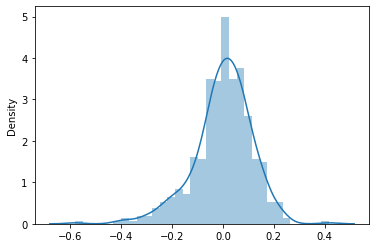

In [90]:
res=y_train-y_train_pred
sns.distplot(res)

# STEP 6 :predictions and evaluation on test data

In [91]:
#create a list of numeric variables
num_vars=["atemp","humidity","windspeed","count"]

#fit the data
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,dec,feb,jan,july,june,march,may,nov,oct,sep
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
df.describe()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,dec,feb,jan,july,june,march,may,nov,oct,sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
y_test=df_test.pop("count")
X_test=df_test

In [94]:
X_train_new=X_train_11.drop(["const"],axis=1)

In [95]:
#creating testing data for X by dropping test variables for x

X_test_sm=X_test[X_train_new.columns]

#add a constant
X_test_sm=sm.add_constant(X_test_sm)

In [96]:
X_test_sm.head()

,const,year,holiday,spring,light_rain,jan,july,nov,sep,aug,dec
184,1.0,0,1,0,0,0,1,0,0,0,0
535,1.0,1,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0,0,0,0,0,0,0,0
221,1.0,0,0,0,0,0,0,0,0,1,0
152,1.0,0,0,0,0,0,0,0,0,0,0


In [97]:
#making predictions
y_pred =lm10.predict(X_test_sm)

# Model Evaluation

Text(0, 0.5, 'ypred')

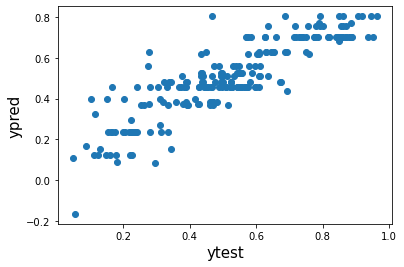

In [98]:
#plotting ytest and ypred to understand the spread
plt.scatter(y_test,y_pred)
plt.xlabel("ytest",fontsize=15)
plt.ylabel("ypred",fontsize=15)

In [99]:
#The model seems to be good enough to predict the demand for bikes 

In [100]:
#calculating the mean squared error-the required libraries are imported in the start 
np.sqrt(mean_squared_error(y_test,y_pred))

0.10789902783646745

In [101]:
# cal the r-square value
r_sq=r2_score(y_test,y_pred)
print(r_sq)

0.7548794164904568


In [102]:
#the r-square value is 75.4%

In [103]:
r2=0.7548794164904568

In [104]:
X_test.shape

(219, 27)

In [105]:
n=X_test.shape[0]

In [106]:
p=X_test.shape[1]

In [107]:
#finding the adjusted r^2 value 
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.720228862800626

In [108]:
X_new=X_train_new.iloc[:,0].values


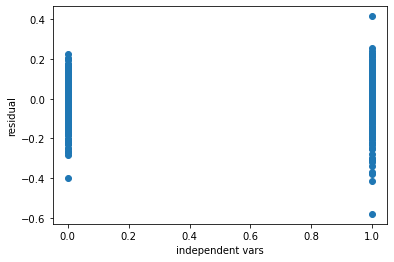

In [109]:
plt.scatter(X_new,res)
plt.xlabel("independent vars",fontsize=10)
plt.ylabel("residual",fontsize=10)
plt.show()

In [110]:
print(X_train_11.columns)
print(lm10.summary())

Index(['const', 'year', 'holiday', 'spring', 'light_rain', 'jan', 'july',
       'nov', 'sep', 'aug', 'dec'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.68e-138
Time:                        15:33:27   Log-Likelihood:                 380.87
No. Observations:                 510   AIC:                            -739.7
Df Residuals:                     499   BIC:                            -693.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

## TRAIN R^2 VALUE =0.739---- ADJUSTED R^2 VALUE=0.734


## TEST R^2 VALUE=0.754----ADJUSTED R^2 VALUE=0.720

In [111]:
# Equation for the best fit line is 

#### count = 0.246 x year - 0.073 x holiday - 0.221 x spring - 0.290 x light_rain - 0.112 x jan + 0.053 x july - 0.077 x nov + 0.100 x sep + 0.066 x aug - 0.084 x dec

#### Top three features which increase demand for bike are:
light_rain,year,spring



In [112]:
#demand increases in case of year,july,sep,aug
#demand decreases in case of holiday,spring,light_rain,jan,nov,dec

## FINAL RECOMMENDATIONS FOR THE COMPANY IS THE DEMAND IS HIGHER IN THE MONTH OF JULY , SEP AND AUG

# 